In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Path to the csv
path="../aus_weather/weatherAUS.csv"
# Reading csv ->df
df_aus_weather=pd.read_csv(path)
df_aus_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
# Display the columns in the dataset
df_aus_weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [4]:
# DF info
df_aus_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [5]:
# Drop records that have any null values
df_aus_weather.dropna(inplace=True)

In [6]:
# Reset Index
df_aus_weather.reset_index(drop=True,inplace=True)

In [7]:
# DF info
df_aus_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 24 columns):
Date             56420 non-null object
Location         56420 non-null object
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null object
WindGustSpeed    56420 non-null float64
WindDir9am       56420 non-null object
WindDir3pm       56420 non-null object
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null object
RISK_MM          

In [8]:
# Maintain a copy of the df
df_aus_weather_cp=df_aus_weather

In [9]:
# Drop the unnecessary columns
df_aus_weather = df_aus_weather.drop(['Date', 'Location','RISK_MM','WindDir9am', 'WindDir3pm'], axis=1)
df_aus_weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,SSW,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,18.4,28.9,0.0,14.8,13.0,S,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,19.4,37.6,0.0,10.8,10.6,NNE,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,21.9,38.4,0.0,11.4,12.2,WNW,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,24.2,41.0,0.0,11.2,8.4,WNW,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [10]:
df_aus_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 19 columns):
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null object
WindGustSpeed    56420 non-null float64
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null object
RainTomorrow     56420 non-null object
dtypes: float64(16), object(3)
memory usage: 8.2+ MB


In [11]:
df_aus_weather.shape

(56420, 19)

In [12]:
df_aus_weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,SSW,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,18.4,28.9,0.0,14.8,13.0,S,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,19.4,37.6,0.0,10.8,10.6,NNE,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,21.9,38.4,0.0,11.4,12.2,WNW,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,24.2,41.0,0.0,11.2,8.4,WNW,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [13]:
# Use get_dummies to convert categorical data (columns - RainToday and RainTomorrow)
bin_encoded_rtod=pd.get_dummies(df_aus_weather["RainToday"],drop_first=True)
bin_encoded_rtom=pd.get_dummies(df_aus_weather["RainTomorrow"],drop_first=True)
df_aus_weather["RainToday"]=bin_encoded_rtod
df_aus_weather["RainTomorrow"]=bin_encoded_rtom

In [14]:
# Verify if RainToday and RainTomorrow are encoded
df_aus_weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,SSW,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,S,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,NNE,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,WNW,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,WNW,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [15]:
df_aus_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 19 columns):
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null object
WindGustSpeed    56420 non-null float64
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null uint8
RainTomorrow     56420 non-null uint8
dtypes: float64(16), object(1), uint8(2)
memory usage: 7.4+ MB


In [16]:
# Use Pandas get_dummies to convert categorical data
df_aus_weather=pd.get_dummies(df_aus_weather)
df_aus_weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,0,1,0,0,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,1,0,0,0,0,0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0,0,0,0,0,0,0,0,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,0,1,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
# Export Pre processed Data
# df_aus_weather.to_csv("preprocessed_data.csv")

# Machine Learning

In [18]:
# Import Dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
df_aus_weather["RainTomorrow"]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       1
18       0
19       0
20       1
21       1
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
56390    0
56391    0
56392    0
56393    0
56394    0
56395    0
56396    0
56397    0
56398    0
56399    0
56400    0
56401    0
56402    0
56403    0
56404    0
56405    0
56406    0
56407    0
56408    0
56409    0
56410    0
56411    0
56412    0
56413    0
56414    0
56415    0
56416    0
56417    0
56418    0
56419    0
Name: RainTomorrow, Length: 56420, dtype: uint8

In [20]:
# Assign X and y values
X=df_aus_weather.drop("RainTomorrow",axis=1)
y=df_aus_weather["RainTomorrow"].values.reshape(-1,1)
print(X.shape,y.shape)

(56420, 33) (56420, 1)


In [21]:
# Split the data into training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [22]:
# Scale or Normalize data
from sklearn.preprocessing import StandardScaler
# Create a StandardScalar model and fit it to the training data
X_scaler=StandardScaler().fit(X_train)

In [23]:
# Transform the training and testing data using the X_scaler 
# Since the features are measured from different scales, appling featruring scaling
X_train=X_scaler.transform(X_train)
X_test=X_scaler.transform(X_test)

# Create Logistic Regression Model

In [24]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [25]:
from sklearn.linear_model import LogisticRegression
classifier_1=LogisticRegression()
classifier_1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# Fit(train) the model using th scaled training data
classifier_1.fit(X_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# Validate the model using the test data
print(f"Training Data Score: {classifier_1.score(X_train,y_train)}")
print(f"Testing Data Score: {classifier_1.score(X_test,y_test)}")

Training Data Score: 0.8534207727756115
Testing Data Score: 0.8567883729174052


In [28]:
# Now that we have trained our algorithm, it’s time to make some predictions.
y_pred_1=classifier_1.predict(X_test)
y_pred_1

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [29]:
# Model Evaluation using Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_1)
cnf_matrix

array([[8343,  456],
       [1160, 1325]])

In [30]:
# Accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

Accuracy: 0.8567883729174052


# Hyperparameter Tuning

In [31]:
# Use GridSearchCV to tune the model's parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 0.01, 0.001, 0.0001],
              'penalty': ["l1", "l2"]}
grid = GridSearchCV(classifier_1, param_grid,n_jobs=-1, cv=5, verbose=3)

In [32]:
grid.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.01, 0.001, 0.0001],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [33]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.1, 'penalty': 'l1'}
0.8535315490960652


In [34]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [35]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.88      0.95      0.91      8799
         red       0.74      0.53      0.62      2485

    accuracy                           0.86     11284
   macro avg       0.81      0.74      0.77     11284
weighted avg       0.85      0.86      0.85     11284



# Feature importance in Logistic Regression using weights

In [36]:
# Extract Column Names
col_names=X.columns.tolist()
col_names

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW']

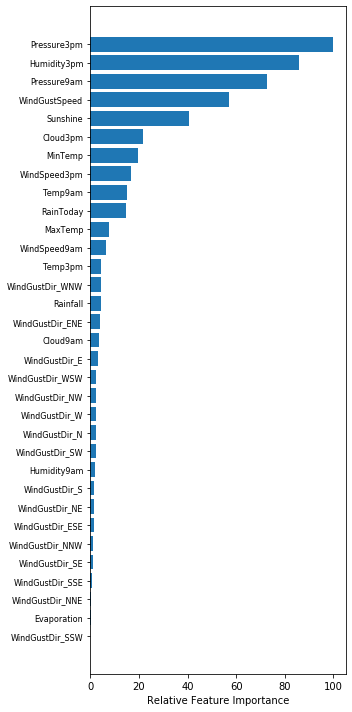

In [37]:
feature_importance = abs(classifier_1.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) 
featfig = plt.figure(figsize=(5,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

# Logistic Regression - Drop the columns with low feature importance

In [38]:
df_aus_weather_cp.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No


In [39]:
df_aus_weather_cp=df_aus_weather_cp.drop(['Date', 'Location','RISK_MM',
                      'WindDir9am', 'WindDir3pm',
                      'WindGustDir', 'Rainfall','Evaporation',
                      'Humidity9am'], axis=1)

In [40]:
df_aus_weather_cp.head()

,MinTemp,MaxTemp,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,12.3,48.0,6.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,18.4,28.9,13.0,37.0,19.0,19.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,19.4,37.6,10.6,46.0,30.0,15.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,21.9,38.4,12.2,31.0,6.0,6.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,24.2,41.0,8.4,35.0,17.0,13.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [41]:
# Use get_dummies to convert categorical data (columns - RainToday and RainTomorrow)
bin_encoded_rtod1=pd.get_dummies(df_aus_weather_cp["RainToday"],drop_first=True)
bin_encoded_rtom1=pd.get_dummies(df_aus_weather_cp["RainTomorrow"],drop_first=True)
df_aus_weather_cp["RainToday"]=bin_encoded_rtod1
df_aus_weather_cp["RainTomorrow"]=bin_encoded_rtom1

In [42]:
# Use Pandas get_dummies to convert categorical data
df_aus_weather_cp=pd.get_dummies(df_aus_weather_cp)
df_aus_weather_cp.head()

,MinTemp,MaxTemp,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,12.3,48.0,6.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,13.0,37.0,19.0,19.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,10.6,46.0,30.0,15.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,12.2,31.0,6.0,6.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,8.4,35.0,17.0,13.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


# Machine Learning - New(updated) dataset

In [43]:
# Assign X and y values
X=df_aus_weather_cp.drop("RainTomorrow",axis=1)
y=df_aus_weather_cp["RainTomorrow"].values.reshape(-1,1)
print(X.shape,y.shape)

(56420, 14) (56420, 1)


In [44]:
# Split the data into training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [45]:
# Scale or Normalize data
from sklearn.preprocessing import StandardScaler
# Create a StandardScalar model and fit it to the training data
X_scaler=StandardScaler().fit(X_train)

In [46]:
# Transform the training and testing data using the X_scaler 
# Since the features are measured from different scales, appling featruring scaling
X_train=X_scaler.transform(X_train)
X_test=X_scaler.transform(X_test)

# Create Logistic Regression Model - New(updated) dataset

In [47]:
from sklearn.linear_model import LogisticRegression
classifier_2=LogisticRegression()
classifier_2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# Fit(train) the model using the scaled training data
classifier_2.fit(X_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
# Validate the model using the test data
print(f"Training Data Score: {classifier_2.score(X_train,y_train)}")
print(f"Testing Data Score: {classifier_2.score(X_test,y_test)}")

Training Data Score: 0.852756114852889
Testing Data Score: 0.8563452676355903


In [50]:
# Now that we have trained our algorithm, it’s time to make some predictions.
y_pred_2=classifier_2.predict(X_test)
y_pred_2

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [51]:
# Model Evaluation using Confusion Matrix
from sklearn import metrics
cnf_matrix_2 = metrics.confusion_matrix(y_test, y_pred_2)
cnf_matrix_2

array([[8333,  466],
       [1155, 1330]])

In [52]:
# Accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_2))

Accuracy: 0.8563452676355903


# Hyperparameter Tuning

In [53]:
# Use GridSearchCV to tune the model's parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 0.01, 0.001, 0.0001],
              'penalty': ["l1", "l2"]}
grid = GridSearchCV(classifier_2, param_grid,n_jobs=-1, cv=5, verbose=3)

In [54]:
grid.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.01, 0.001, 0.0001],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [55]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.1, 'penalty': 'l2'}
0.852844735909252


In [56]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [57]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.88      0.95      0.91      8799
         red       0.74      0.53      0.62      2485

    accuracy                           0.86     11284
   macro avg       0.81      0.74      0.77     11284
weighted avg       0.85      0.86      0.85     11284



# Repeating the LR model with weatherAUS_feature_engineer.csv

In [58]:
# Path to the csv
path="../aus_weather/weatherAUS_feature_engineer.csv"
# Reading csv ->df
df_aus_weather_feat_eng=pd.read_csv(path)
df_aus_weather_feat_eng.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,rain_today_b,rain_tomorrow_b,temp_change_9to3,temp_change_min_max,humidity_change,humidity_change_percent,pressure_change,wind_change_direction,wind_gust_change_3,wind_gust_change_9
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,False,False,6.8,17.3,7.0,0.350000,1.9,False,True,True
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,False,False,6.7,10.5,22.0,0.733333,0.8,True,True,True
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,False,False,6.2,18.2,20.0,0.476190,3.1,False,True,False
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,False,False,6.5,16.5,15.0,0.405405,3.6,False,True,False
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,False,False,4.0,16.8,4.0,0.210526,3.3,False,False,True


In [59]:
df_aus_weather_feat_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66646 entries, 0 to 66645
Data columns (total 26 columns):
MinTemp                    66646 non-null float64
MaxTemp                    66646 non-null float64
Rainfall                   66646 non-null float64
Evaporation                66646 non-null float64
Sunshine                   66646 non-null float64
WindGustSpeed              66646 non-null float64
WindSpeed9am               66646 non-null float64
WindSpeed3pm               66646 non-null float64
Humidity9am                66646 non-null float64
Humidity3pm                66646 non-null float64
Pressure9am                66646 non-null float64
Pressure3pm                66646 non-null float64
Cloud9am                   66646 non-null float64
Cloud3pm                   66646 non-null float64
Temp9am                    66646 non-null float64
Temp3pm                    66646 non-null float64
rain_today_b               66646 non-null bool
rain_tomorrow_b            66646 non-null bo

In [60]:
#Import Dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [61]:
#Assign X and y values
X=df_aus_weather_feat_eng.drop("rain_tomorrow_b",axis=1)
y=df_aus_weather_feat_eng["rain_tomorrow_b"].values.reshape(-1,1)
print(X.shape,y.shape)

(66646, 25) (66646, 1)


In [62]:
#Split the data into training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [63]:
#Scale or Normalize data
from sklearn.preprocessing import StandardScaler
#Create a StandardScalar model and fit it to the training data
X_scaler=StandardScaler().fit(X_train)

In [64]:
#Transform the training and testing data using the X_scaler 
#Since the features are measured from different scales, appling featruring scaling
X_train=X_scaler.transform(X_train)
X_test=X_scaler.transform(X_test)

In [65]:
from sklearn.linear_model import LogisticRegression
classifier_3=LogisticRegression()
classifier_3

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
#Fit(train) the model using the scaled training data
classifier_3.fit(X_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
#Validate the model using the test data
print(f"Training Data Score: {classifier_3.score(X_train,y_train)}")
print(f"Testing Data Score: {classifier_3.score(X_test,y_test)}")

Training Data Score: 0.8550153799984995
Testing Data Score: 0.8526631657914479


In [68]:
# Now that we have trained our algorithm, it’s time to make some predictions.
y_pred_3=classifier_3.predict(X_test)
y_pred_3

array([False, False, False, ...,  True, False,  True])

In [69]:
# Model Evaluation using Confusion Matrix
from sklearn import metrics
cnf_matrix_3 = metrics.confusion_matrix(y_test, y_pred_3)
cnf_matrix_3

array([[9729,  564],
       [1400, 1637]])

In [70]:
# Accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_3))

Accuracy: 0.8526631657914479


# Hyperparameter Tuning

In [71]:
# Use GridSearchCV to tune the model's parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 0.01, 0.001, 0.0001],
              'penalty': ["l1", "l2"]}


In [72]:
grid = GridSearchCV(classifier_2, param_grid,n_jobs=-1, cv=5, verbose=3)

In [73]:
grid.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.01, 0.001, 0.0001],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [74]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.1, 'penalty': 'l2'}
0.854940355615575


In [75]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [76]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.87      0.95      0.91     10293
         red       0.74      0.54      0.63      3037

    accuracy                           0.85     13330
   macro avg       0.81      0.74      0.77     13330
weighted avg       0.84      0.85      0.84     13330



# Save the model

In [77]:
# save fitted model to file
import joblib
filename = 'logistic.sav'
joblib.dump(classifier_3, filename)

['logistic.sav']